In [0]:
#functions to read and show images
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns


In [0]:
#importing the MNIST dataset from tensorflow
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("MNIST_data/",one_hot=False)
tr_x,tr_y,te_x,te_y=mnist.train.images,mnist.train.labels,mnist.test.images,mnist.test.labels

In [0]:
tr_x.shape #shape of original data

(55000, 784)

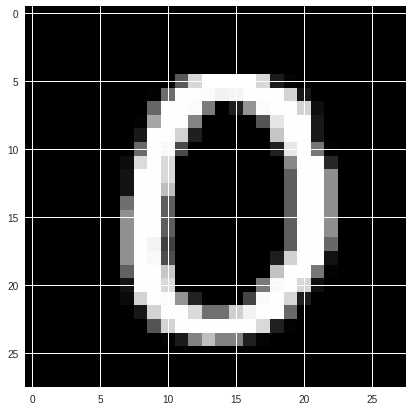

Ground Truth Label : 0


In [0]:
#display or plot a number
plt.figure(figsize=(7,7))
idx=10
grid_data=tr_x[idx].reshape(28,28) #reshape from 1d to 2d pixel array
plt.imshow(grid_data,interpolation="none",cmap="gray")
plt.show()

print("Ground Truth Label :",tr_y[idx])

**Principle Component Analysis From Scratch (without using Scikit-Learn)**

In [0]:
#Data Preprocessing :Standardizing the data
from sklearn.preprocessing import StandardScaler

standardized_data=StandardScaler().fit_transform(tr_x)
standardized_data.shape

(55000, 784)

In [0]:
#Computing the covaariance matrix which is A.T*T
covar_matrix=np.matmul(standardized_data.T,standardized_data)
covar_matrix.shape

(784, 784)

In [0]:
#Find the top 2 eigen values and corresponding eigen vectors 
#To plot on a 2-d graph
from scipy.linalg import eigh

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.

values,vectors=eigh(covar_matrix,eigvals=[782,783])
vectors.shape

(784, 2)

In [0]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.
new_data=np.matmul(standardized_data,vectors)
new_data.shape

(55000, 2)

In [0]:
#Stacking labels to the final data
new_data=np.vstack((new_data.T,tr_y)).T
new_data.shape

(55000, 3)

In [0]:
# creating a new data frame for ploting the labeled points.
df=pd.DataFrame(new_data,columns=["1st component","2nd component","labels"])

In [0]:
#Shows the first 5 elements of our reduced 2-d data
df.head()

,1st component,2nd component,labels
0,13.669526,1.795119,7.0
1,-5.299331,-0.538548,3.0
2,4.809733,-3.472403,4.0
3,-3.202100,-1.672603,6.0
4,-2.016297,-7.643477,1.0


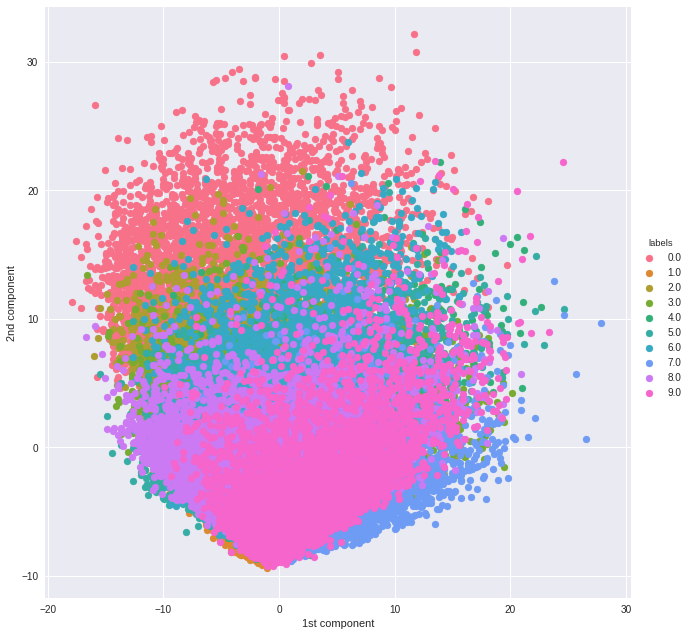

In [0]:
#plotting the 2-d data points with seaborn
sns.FacetGrid(df,hue="labels",size=9).map(plt.scatter,"1st component","2nd component").add_legend()
plt.show()

**Principle Component Analysis Using Scikit-Learn:-**

In [0]:
#importing and initializing the PCA
from sklearn import decomposition
pca=decomposition.PCA()

In [0]:
#configuring the parameters
#No. of components=2
pca.n_components=2
new_data=pca.fit_transform(standardized_data)
# pca_reduced will contain the 2-d projects of simple data
print("shape of reduced dataset : ",new_data.shape)

shape of reduced dataset :  (55000, 2)


In [0]:
#Stacking labels to the final data
new_data=np.vstack((new_data.T,tr_y)).T
new_data.shape

(55000, 3)

In [0]:
# creating a new data frame for ploting the labeled points.
df=pd.DataFrame(new_data,columns=["1st component","2nd component","labels"])

In [0]:
df.head() #Shows the first 5 elements of our reduced 2-d data

,1st component,2nd component,labels
0,1.795113,13.667578,7.0
1,-0.538433,-5.298883,3.0
2,-3.472316,4.809953,4.0
3,-1.672540,-3.202715,6.0
4,-7.643387,-2.016112,1.0


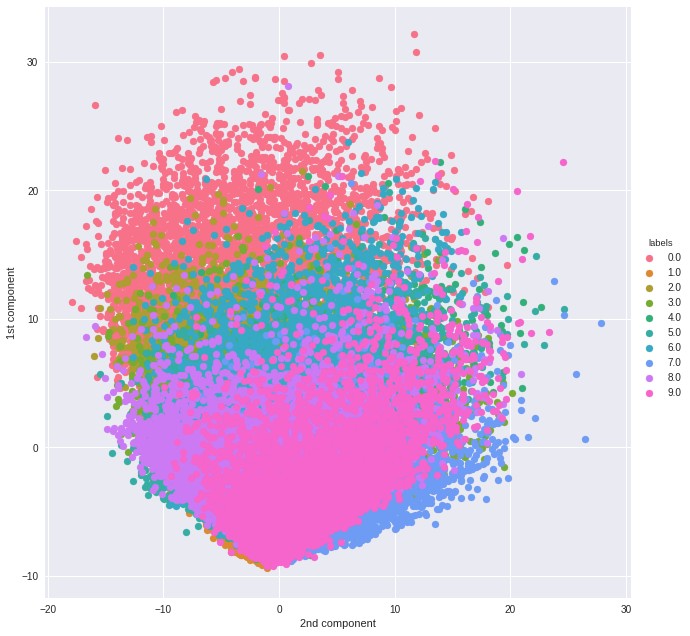

In [0]:
#plotting the 2-d data points with seaborn
sns.FacetGrid(df,hue="labels",size=9).map(plt.scatter,"2nd component","1st component").add_legend()